<h3>Plot Group WS - Wimble Shoals</h3>

Processing and plotting sediment distribution data collected along a sextet of transects on, across, at, or near the Wimble Shoals area off Hatteras Island in North Carolina.

The collection date for the data is unknown.

Initial notebook prep and plotting: November, 2, 2016

<h4>Import requisite modules and libraries</h4>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

<h4>Set paths and preliminaries</h4>

In [13]:
# Set the path to the source data file and provide the name of the source file,itself: ADJUST manually
datapath='/Users/paulp/GoogleDrive/projects/PeaIslandBeachMonitoring/data/'
fn='Wimble Shoals.csv'

sample ='A'  # the sample to be processed (A,B,C, or D) for the 4 positions along each transect. ADJUST manually

<h4>Load the data into a pandas dataframe:</h4>

In [14]:
### Load the data:
hdr=['id','transect','sample','p>-1','p-1to0','p0to1','p1to2','p2to275','p275to325','p<325']

df=pd.read_csv(datapath+fn, header=0, names=hdr)
df

,id,transect,sample,p>-1,p-1to0,p0to1,p1to2,p2to275,p275to325,p<325
0,S1_A,S1,A,27.8,24.3,19.3,18.6,9.0,0.2,0.8
1,S1_B,S1,B,2.0,4.7,18.8,50.9,21.5,0.7,1.4
2,S1_C,S1,C,1.1,3.0,16.6,55.4,22.3,0.8,0.8
3,S1_D,S1,D,0.2,0.8,28.2,65.3,5.1,0.4,0.0
4,S2_A,S2,A,24.4,14.0,16.5,28.5,14.9,0.6,1.1
5,S2_B,S2,B,7.7,10.6,24.7,42.9,12.1,0.7,1.3
6,S2_C,S2,C,0.6,0.9,7.6,58.4,30.3,1.5,0.7
7,S2_D,S2,D,0.3,2.1,34.5,56.9,5.3,0.5,0.4
8,S3_A,S3,A,4.7,9.3,20.6,42.5,21.3,0.8,0.8
9,S3_B,S3,B,3.9,8.5,26.1,46.1,13.6,0.4,1.4


<h4>Do the data 'munging' to prep it for plotting</h4>

In [15]:
# Query the dataframe to locate those recs for the current sample: NOTE that sample is set in the ealier Preliminaries 
# cell...
query_string='sample == '+'\"'+sample+'\"'
df1 = df.query(query_string) 

# aggregate the fine fractions (phi) 'p2to275','p275to325','p<325' into single fraction: 'fine_sand'
df1['fine_sand']=df1['p2to275']+df1['p275to325']+df1['p<325']
df1

/Applications/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,id,transect,sample,p>-1,p-1to0,p0to1,p1to2,p2to275,p275to325,p<325,fine_sand
0,S1_A,S1,A,27.8,24.3,19.3,18.6,9.0,0.2,0.8,10.0
4,S2_A,S2,A,24.4,14.0,16.5,28.5,14.9,0.6,1.1,16.6
8,S3_A,S3,A,4.7,9.3,20.6,42.5,21.3,0.8,0.8,22.9
12,S4_A,S4,A,2.9,11.9,29.0,38.0,15.8,0.3,2.1,18.2
16,S5_A,S5,A,11.2,12.2,18.7,35.5,20.5,1.2,0.7,22.4
20,S6_A,S6,A,25.3,18.3,18.5,21.1,15.6,0.6,0.6,16.8


<h4>Plot the sample data:</h4>

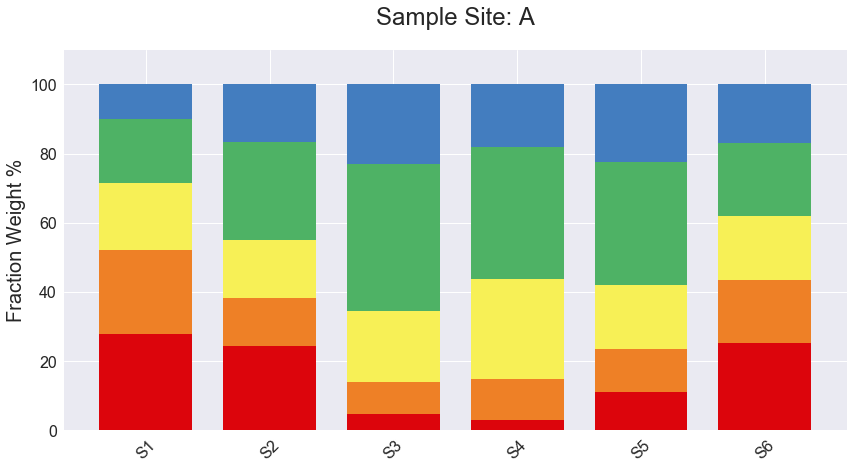

In [16]:
    ### Do up the'Rainbow' Plots:
    f, ax1 = plt.subplots(1, figsize=(15,7))
    plt.gcf().subplots_adjust(right=0.85)

    # Set the bar width
    bw = 0.75

    # positions of the left bar-boundaries
    bar_l = [i+1 for i in range(len(df1['p>-1']))] 

    # positions of the x-axis ticks (center of the bars as bar labels)
    tick_pos = [i for i in bar_l] 

    phis=['p>-1','p-1to0','p0to1','p1to2','fine_sand'] # 'p2to275','p275to325','p<325']
    transects=['S1','S2','S3','S4','S5','S6']
    labs=['Gravel','Very Coarse Sand','Coarse Sand','Medium Sand','Fine Sand']  #,'Fine Sand','Very Fine Sand']

    # calc bottom positions for each sand fractionbar segment (it's a giant list!):
    # there must be a more elegant way to do this, but at the time of this writing
    # time is of the essence, so 'meathead' it is, for now...
    bots=[0, df1['p>-1'],
    [i+j for i,j in zip(df1['p>-1'],df1['p-1to0'])],
    [i+j+k for i,j,k in zip(df1['p>-1'],df1['p-1to0'],df1['p0to1'])],
    [sum(values) for values in zip(df1['p>-1'],df1['p-1to0'],df1['p0to1'],df1['p1to2'])] ] 
    #,[sum(values) for values in zip(df1['p>-1'],df1['p-1to0'],df1['p0to1'],df1['p1to2'],df1['p2to275'])],   
    #[sum(values) for values in zip(df1['p>-1'],df1['p-1to0'],df1['p0to1'],df1['p1to2'],df1['p2to275'], df1['p275to325'])]
    #     ]
    colrs=['#dc050c','#ee8026','#f7f056','#4eb265','#437dbf','#882e72']
    for phi, bot, colr, lab  in zip(phis, bots, colrs, labs):
        sbp=ax1.bar(bar_l, df1[phi], width=bw, bottom=bot, label=lab, alpha=1, color=colr)

    # set the x-axis ticks with names
    plt.xticks(tick_pos, transects, size=16, rotation=45 )
    plt.yticks(size=16)
    plt.ylim(0,110)
    plt.bbox_inches=2.0

    #plt.xlabel('Transect')
    plt.ylabel('Fraction Weight %', size=20)
    plt.title('Sample Site: '+sample, size=24, position=([0.5,1.05])) 
    #plt.legend(bbox_to_anchor=(1.15, 1.0))
    plotpath='/Users/paulp/GoogleDrive/projects/USFWS_PeaIslandNWR/plots/plotGroupWS/'
    #plt.savefig(plotpath+'WS_StackedWeightPecentFractions_Site_'+sample+'.jpeg', res=300) 